In [1]:
from sklearn import tree
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomTreesEmbedding

iris = datasets.load_iris()

samples = iris.data
labels = iris.target
n_sample = samples.shape[0]
n_feature = samples.shape[1]

In [2]:
clf = RandomTreesEmbedding(n_estimators=500, max_depth = 10)
clf = clf.fit(samples)
print(clf)

RandomTreesEmbedding(max_depth=10, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, random_state=None, sparse_output=True,
                     verbose=0, warm_start=False)


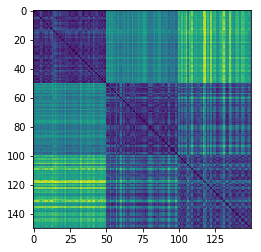

In [3]:
forest = clf.estimators_
d = np.zeros([n_sample, n_sample])

for k in range(500):
    
    tree = forest[k]
    
    path = tree.decision_path(samples).todense()
    n_nodes = tree.tree_.node_count
    
    for i in range(n_sample):
        for j in range(n_sample):
            sample_ids = [i, j]
            d[i, j] = d[i, j]+(path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            
            
d = d/500
d_Nearest_Common_Ancestor = [1/x for x in d]
plt.imshow(d_Nearest_Common_Ancestor)
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="complete")
predict_labels = cluster.fit_predict(d_Nearest_Common_Ancestor)
score = adjusted_rand_score(labels, predict_labels)

print("labels\n", labels)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Adjusted Rand Score: 0.7322981167185345


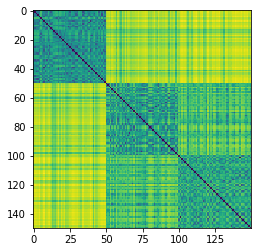

In [5]:
forest = clf.estimators_
d = np.zeros([n_sample, n_sample])

for k in range(500):
    
    tree = forest[k]
    
    path = tree.decision_path(samples).todense()
    n_nodes = tree.tree_.node_count
    l_children = tree.tree_.children_left
    r_children = tree.tree_.children_right
    
    node_depth = np.zeros(n_nodes)
    is_leaves = np.zeros(n_nodes)
    stack = [(0, -1)]
    
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        if (l_children[node_id] != r_children[node_id]):
            stack.append((l_children[node_id], parent_depth + 1))
            stack.append((r_children[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = 1
    
    for i in range(n_sample):
        for j in range(n_sample):
            sample_ids = [i, j]
            splitting_depth = (path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            leaf_i = tree.apply(samples[i].reshape(1, -1))
            leaf_j = tree.apply(samples[j].reshape(1, -1))
            d[i, j] = d[i, j]+node_depth[leaf_i]+node_depth[leaf_j]-2*splitting_depth
            
d = d/500
plt.imshow(d)
plt.show()

In [15]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="complete")
predict_labels = cluster.fit_predict(d)
score = adjusted_rand_score(labels, predict_labels)

print("labels\n", labels)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Adjusted Rand Score: 0.7183576141196959


(150, 48383)


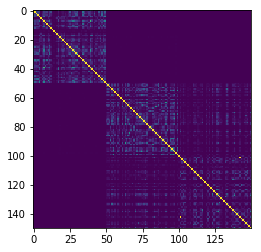

In [7]:
Y = clf.transform(samples)
print(Y.shape)
prob = np.zeros([n_sample, n_sample])
for i in range(n_sample):
    for j in range(n_sample):
        leaf_i = Y[i, :]
        leaf_j = Y[j, :]
        p = leaf_i.dot(leaf_j.transpose()).todense()
        prob[i, j] = p[0, 0]

prob = prob / Y.shape[1]
        
plt.imshow(prob)
plt.show()

In [12]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(1-prob)
score = adjusted_rand_score(labels, predict_labels)

print("labels\n", labels)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 1 1 0 0 0 0 0 0 0 2 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Adjusted Rand Score: 0.4956626580851429
